# XAI - Actividad 1

Grupo 1:
<ul>
<li>Lidia Abad Azcutia</li>
<li>Sergio Arroni del Riego</li>
<li>David González Fernández</li>
</ul>

In [1]:
#@title Imports
from math import factorial as fact
from typing import Dict, List, Tuple, Generator
from itertools import combinations

In [2]:
#@title Helper functions to do the activity 1
"""Generator for all the combinations except the tuple D"""
def get_all_combinations(individuals: List[int]) -> Generator[Tuple[int, ...], None, None]:
  for size in range(0, len(individuals)):
    for combination in combinations(individuals, size):
      yield combination


"""Returns the weighting for a given combination"""
def get_weighting(size_S: int, size_d: int) -> float:
  weighting = (fact(size_S) * fact(size_d - 1 - size_S)) / (fact(size_d))
  return weighting


"""Gets the contribution of a given individual to a particular subset"""
def get_contribution(i: int, tuple_without_i: Tuple[int, ...], get_value) -> int:
  value_without_i: int = get_value(tuple_without_i)
  assert len(tuple_without_i)>0  or  value_without_i==0, "Value of empty != 0"

  tuple_with_i: Tuple[int, ...] = (i,) + tuple_without_i
  value_with_i: int = get_value(tuple_with_i)

  return value_with_i - value_without_i


"""Calculates the credit for each individual in the game"""
def get_credits(individuals: List[int], get_value) -> Dict[int, float]:
  assert len(individuals) > 0, "Individual list if empty"

  credits: Dict[int, float] = {individual:0 for individual in individuals}

  for combination in get_all_combinations(individuals):
    weight = get_weighting(len(combination), len(individuals))
    assert weight >= 0

    for individual in filter(lambda i : i not in combination, individuals):
      contribution = get_contribution(individual, combination, get_value)
      credits[individual] += weight*contribution

  expected: int = get_value(individuals) - get_value(())
  actual = sum(credits.values())
  # epsilon to account for errors when using float values
  epsilon = 1e-10
  assert expected-epsilon <= actual <= expected+epsilon

  return credits


"""Given the credit dict, prints the credits"""
def print_credits(credits: Dict[int, float]):
  for (individual, value) in credits.items():
    print(f"Individual: {individual} -> Credit: {value}")

## Ejercicio 1
Calcula el valor Shapley para todos los jugadores $i ∈ \{1, 2, 3\}$ en el siguiente juego cooperativo v(S):

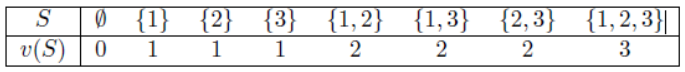

In [3]:
#@title Initialize the 1st problem
individuals_1: Tuple[int, ...] = (1, 2, 3)

values_1: Dict[Tuple[int, ...], int] = {
    (): 0,
    (1,): 1,
    (2,): 1,
    (3,): 1,
    (1,2): 2,
    (1,3): 2,
    (2,3): 2,
    (1,2,3): 3
}

def get_values_1(subset: Tuple[int, ...]) -> int:
  subset = tuple(sorted(subset))
  return values_1[subset]


In [4]:
#@title Get solution to the 1st problem
credits_1 = get_credits(individuals_1, get_values_1)
print_credits(credits_1)

Individual: 1 -> Credit: 1.0
Individual: 2 -> Credit: 1.0
Individual: 3 -> Credit: 1.0


## Ejercicio 2
Calcula el valor Shapley para todos los jugadores $i ∈ \{1, 2, 3\}$ en el siguiente juego cooperativo v(S):

$v(S) = x_1 + 2 \cdot x_2 + 3 \cdot x_3$

, donde $x_i$ son variables binarias siendo $x_i = 1$ si $i ∈ S$ y $0$ si no.

In [5]:
#@title Initialize the 2nd problem
individuals_2: Tuple[int, ...] = (1, 2, 3)

def get_values_2(subset: Tuple[int, ...]) -> int:
  x_values = [1 if i in subset else 0 for i in individuals_2]

  res = x_values[0]
  res += 2*x_values[1]
  res += 3*x_values[2]

  return res

In [6]:
#@title Get solution to the 2nd problem
credits_2 = get_credits(individuals_2, get_values_2)
print_credits(credits_2)

Individual: 1 -> Credit: 1.0
Individual: 2 -> Credit: 2.0
Individual: 3 -> Credit: 3.0


## Ejercicio 3
Calcula el valor Shapley para todos los jugadores $i ∈ \{1, 2, 3, 4, 5\}$ en el siguiente juego cooperativo v(S):

$v(S) = x_1 + x_3 + 2 \cdot x_4 + 3 \cdot x_1 \cdot x_2 + 5 \cdot x_2 \cdot x_5 - 10 \cdot x_1 \cdot x_2 \cdot x_4$

, donde $x_i$ son variables binarias siendo $x_i = 1$ si $i ∈ S$ y $0$ si no.

In [7]:
#@title Initialize the 3rd problem
individuals_3: Tuple[int, ...] = (1, 2, 3, 4, 5)

def get_values_3(subset: Tuple[int, ...]) -> int:
  x_values = [1 if i in subset else 0 for i in individuals_3]

  res = x_values[0]
  res += x_values[2]
  res += 2*x_values[3]
  res += 3*x_values[0]*x_values[1]
  res += 5*x_values[1]*x_values[4]
  res -= 10*x_values[0]*x_values[1]*x_values[3]

  return res

In [8]:
#@title Get solution to the 3rd problem
credits_3 = get_credits(individuals_3, get_values_3)
print_credits(credits_3)

Individual: 1 -> Credit: -0.8333333333333335
Individual: 2 -> Credit: 0.6666666666666666
Individual: 3 -> Credit: 1.0000000000000002
Individual: 4 -> Credit: -1.3333333333333337
Individual: 5 -> Credit: 2.5
